In [64]:
from astropy.io import ascii
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## Problem 1: Using CDF to draw from non-standard PDF 

$P(y)$ must be normalized so that $\int_0^1 P(y) \, $d$y = 1$

$\int_0^1 ky \,$d$y$ = k/2 = 1, so k = 2

now we invert this equation to solve for y(x)

$x = F(y) = \int_0^y 2y' $d$y' = y^2 $

$\sqrt{x} = y(x)$

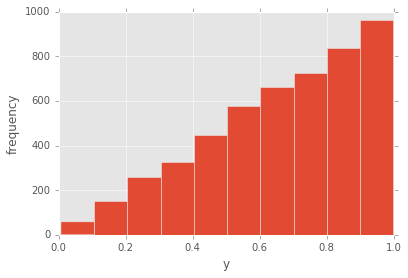

In [72]:
#sample 5000 points from a uniform distribution
x=np.random.random(5000)
#invert them using the expressing we found above to get our y's
y=np.sqrt(x)
#lets plot a histogram to see if we get the linear PDF we want
plt.hist(y)
plt.ylabel('frequency')
plt.xlabel('y')

## Problem 3: Covariance, correlation, and hypothesis testing

In [66]:
#read in the data
table=ascii.read('lx_t.dat')

#define our variables
x=np.log10(table['L'].data)
y=np.log10(table['T'].data)
x_bar = x.mean()
y_bar = y.mean()
N=x.size

#define departures from the mean. this will make some caluculations look neater below
x_dep=(x-x_bar)
y_dep=(y-y_bar)

#calculate covariances. remember its symmetric so Cxy = Cyx
Cxx=x_dep.dot(x_dep.T)/N
Cyy=y_dep.dot(y_dep.T)/N
Cxy=x_dep.dot(y_dep.T)/N

#r can be constructed from the values we calculated
r=Cxy/(np.sqrt(Cxx*Cyy))

In [26]:
1/np.sqrt(N)

0.060522753266880246

In [27]:
r

0.89690488054015771

In [67]:
a= y_bar - ((Cxy)/(Cxx**2))*x_bar

b=((Cxy)/(Cxx**2))

x_model = x.copy()

x_model.sort()

y_model =  a + b*x_model

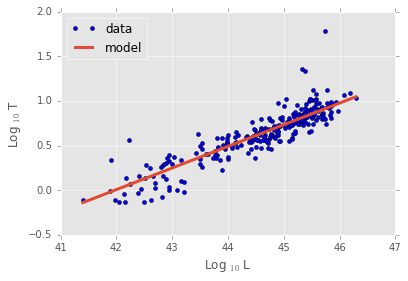

In [69]:
plt.xlabel('Log $_{10}$ L')
plt.ylabel('Log $_{10}$ T')
plt.plot(x, y, 'bo', ms=4.0, label='data')
plt.plot(x_model, y_model, linewidth=3.0, label='model')
plt.legend(loc="upper left")